In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
basemap = cx.providers.CartoDB.VoyagerNoLabels

In [2]:
pth = os.path.join('..', 'data', 'RevelioLabs_LocationSample_Nov22.csv')
df = pd.read_csv(pth, index_col = 0); df

,city,state,country,latitude,longitude,population,msa
0,mahopac,new york,united states,41.37232,-73.73346,8369,New York-Northern New Jersey-Long Island NY-NJ...
1,seven hills,ohio,united states,41.39533,-81.67624,11690,NaN
2,new martinsville,west virginia,united states,39.64452,-80.85760,5218,WV NONMETROPOLITAN AREA
3,sint anthonis,north brabant,netherlands,51.62667,5.88194,3340,NaN
4,machali,o higgins region,chile,-34.18082,-70.64933,27595,NaN
...,...,...,...,...,...,...,...
32094,mansfield,texas,united states,32.56319,-97.14168,64274,Mansfield OH MSA
32095,belfast,maine,united states,44.42591,-69.00642,6682,ME NONMETROPOLITAN AREA
32096,flushing,michigan,united states,43.06308,-83.85107,8086,Wheeling WV-OH MSA
32097,stone mountain,georgia,united states,33.80816,-84.17020,6109,Atlanta-Sandy Springs-Marietta GA MSA


In [3]:
# remove low-population outliers
df = df.loc[df.population > 10].copy()
df.reset_index(drop = True, inplace = True); df

,city,state,country,latitude,longitude,population,msa
0,mahopac,new york,united states,41.37232,-73.73346,8369,New York-Northern New Jersey-Long Island NY-NJ...
1,seven hills,ohio,united states,41.39533,-81.67624,11690,NaN
2,new martinsville,west virginia,united states,39.64452,-80.85760,5218,WV NONMETROPOLITAN AREA
3,sint anthonis,north brabant,netherlands,51.62667,5.88194,3340,NaN
4,machali,o higgins region,chile,-34.18082,-70.64933,27595,NaN
...,...,...,...,...,...,...,...
24022,mansfield,texas,united states,32.56319,-97.14168,64274,Mansfield OH MSA
24023,belfast,maine,united states,44.42591,-69.00642,6682,ME NONMETROPOLITAN AREA
24024,flushing,michigan,united states,43.06308,-83.85107,8086,Wheeling WV-OH MSA
24025,stone mountain,georgia,united states,33.80816,-84.17020,6109,Atlanta-Sandy Springs-Marietta GA MSA


In [4]:
# clean up msa labels
df.loc[df.msa.isna(), 'msa'] = 'None'
df['US'] = df.country.isin(['united states'])
df.loc[~df.US, 'msa'] = 'None'
df.loc[~df.msa.duplicated(keep = False), 'msa'] = 'None'
df.loc[df.msa.str.contains('NONMETROPOLITAN'), 'msa'] = 'None'
df['msa'] = df.msa.replace('None', pd.NA).astype('string')

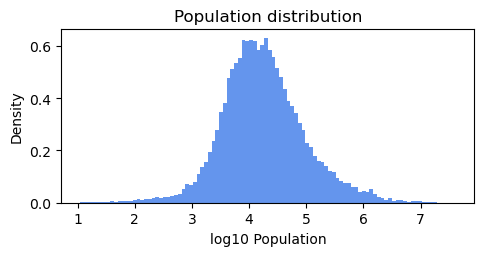

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (5.33, 2.25))
ax.hist(np.log10(df.population),
        bins = 100,
        facecolor = 'cornflowerblue',
        density = True)
plt.title('Population distribution')
plt.xlabel('log10 Population')
plt.ylabel('Density')
plt.show()

In [6]:
# geodetic coordinates (lat/lon) -> web mercator projection (for plotting)
points = gpd.points_from_xy(df.longitude, df.latitude, crs = 'EPSG:4326')
gdf = gpd.GeoDataFrame(df, geometry = points).to_crs(epsg = 3857); gdf

,city,state,country,latitude,longitude,population,msa,US,geometry
0,mahopac,new york,united states,41.37232,-73.73346,8369,New York-Northern New Jersey-Long Island NY-NJ...,True,POINT (-8207971.222 5067414.863)
1,seven hills,ohio,united states,41.39533,-81.67624,11690,<NA>,True,POINT (-9092157.447 5070828.79)
2,new martinsville,west virginia,united states,39.64452,-80.85760,5218,<NA>,True,POINT (-9001026.859 4814418.565)
3,sint anthonis,north brabant,netherlands,51.62667,5.88194,3340,<NA>,False,POINT (654774.566 6732902.058)
4,machali,o higgins region,chile,-34.18082,-70.64933,27595,<NA>,False,POINT (-7864647.44 -4053107.653)
...,...,...,...,...,...,...,...,...,...
24022,mansfield,texas,united states,32.56319,-97.14168,64274,Mansfield OH MSA,True,POINT (-10813762.352 3837467.237)
24023,belfast,maine,united states,44.42591,-69.00642,6682,<NA>,True,POINT (-7681759.536 5531591.056)
24024,flushing,michigan,united states,43.06308,-83.85107,8086,Wheeling WV-OH MSA,True,POINT (-9334258.415 5321578.2)
24025,stone mountain,georgia,united states,33.80816,-84.17020,6109,Atlanta-Sandy Springs-Marietta GA MSA,True,POINT (-9369783.804 4003071.597)


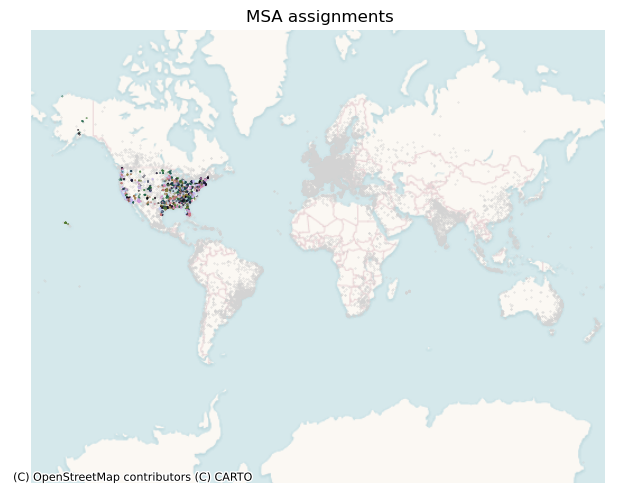

In [7]:
ms = .1
na_dict = {'color' : 'lightgrey', 
           'markersize' : ms, 
           'zorder' : 10}

fig, ax = plt.subplots(1, 1, figsize = (8, 8))
gdf.plot(column = 'msa', 
         cmap = 'cubehelix', 
         markersize = ms, 
         zorder = 100,
         missing_kwds = na_dict,
         ax = ax)
cx.add_basemap(ax, source = basemap, zorder = 0)
ax.set_title('MSA assignments')
ax.axis(False)
plt.show()

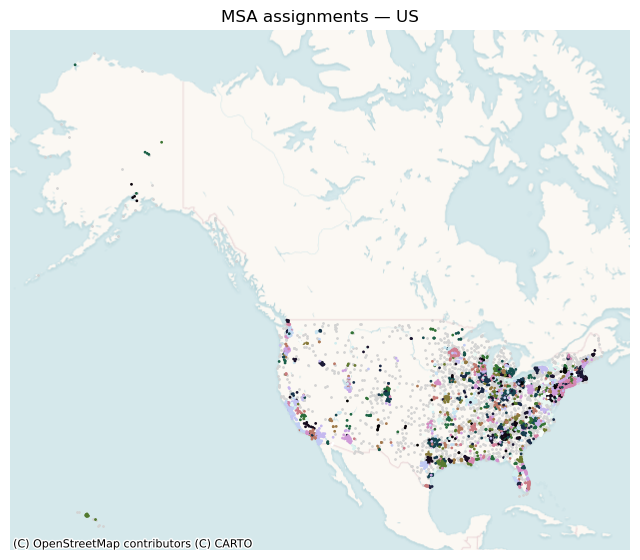

In [8]:
ms = 1.
na_dict['markersize'] = ms
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
gdf.loc[gdf.US].plot(column = 'msa',
                     cmap = 'cubehelix',
                     markersize = ms,
                     zorder = 100,
                     missing_kwds = na_dict,
                     ax = ax)
cx.add_basemap(ax, source = basemap, zorder = 0)
ax.set_title('MSA assignments — US')
ax.axis(False)
plt.show()

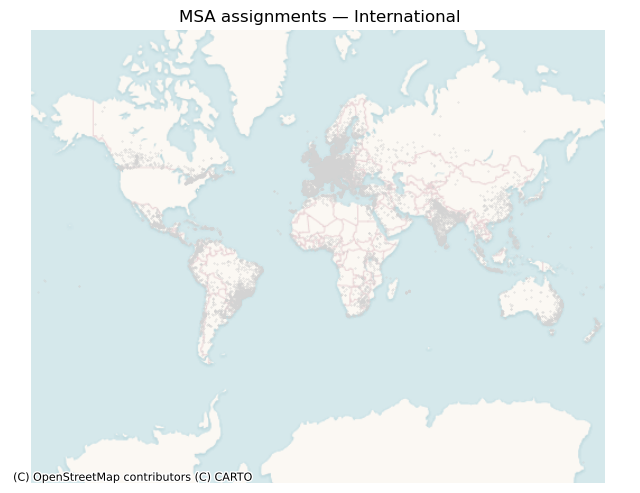

In [10]:
ms = .1
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
gdf.loc[~gdf.US].plot(color = na_dict['color'],
                      markersize = ms,
                      ax = ax)
cx.add_basemap(ax, source = basemap, zorder = 0)
ax.set_title('MSA assignments — International')
ax.axis(False)
plt.show()

In [11]:
# save data
pth = os.path.join('..', 'data', 'geodataframe.gpkg')
gdf.to_file(pth, driver = 'GPKG')